In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal
import ENDF6

In [2]:
import ENDF6el as endfel

f = endfel.fetch_elastic(filename='../xn_data/si28_el.txt')
print(f([0.896,1.0,1.158,1.542]))

[2.88760675 4.67949255 1.60752601 2.46483739]


In [3]:
(en,al)=endfel.fetch_elastic_angular('../xn_data/n-014_Si_028.endf')

In [4]:
dsdomeg=endfel.fetch_diff_xn(En=0.04e6)
dsdomegv=np.vectorize(dsdomeg)

dsdomeg1=endfel.fetch_diff_xn(En=0.896e6)
dsdomeg1v=np.vectorize(dsdomeg1)

dsdomeg2=endfel.fetch_diff_xn(En=1.158e6)
dsdomeg2v=np.vectorize(dsdomeg2)

dsdomeg3=endfel.fetch_diff_xn(En=1.542e6)
dsdomeg3v=np.vectorize(dsdomeg3)

dsdomeg4=endfel.fetch_diff_xn(En=1e6)
dsdomeg4v=np.vectorize(dsdomeg4)

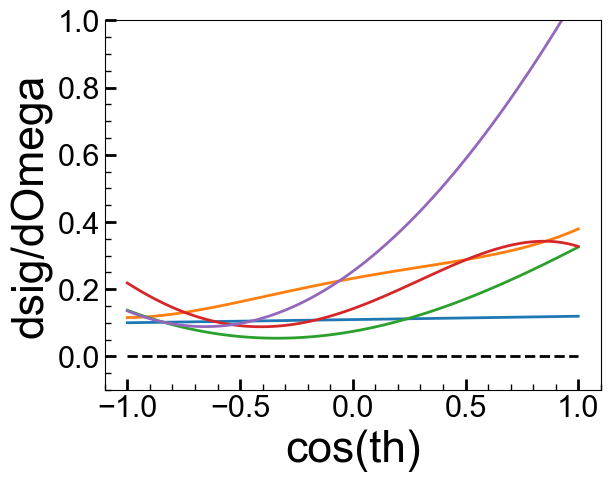

In [5]:
#plot quick
from pylab import *
ct = np.linspace(-1.0,1.0,100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(ct, dsdomegv(ct))
plot(ct, dsdomeg1v(ct))
plot(ct, dsdomeg2v(ct))
plot(ct, dsdomeg3v(ct))
plot(ct, dsdomeg4v(ct))
ax1.hlines(0,-1,1,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(-0.1,1.0)
xlabel('cos(th)')
ylabel('dsig/dOmega')
show()

In [6]:
import masses as ms

m28si = ms.getMass(14,28)

In [7]:
fac = m28si*ms.m_n/(m28si+ms.m_n)**2

In [8]:
escale = 2*fac*(1-np.linspace(-1.0,1.0,100))

In [9]:
print(escale)

[0.13438585 0.13302842 0.13167098 0.13031355 0.12895612 0.12759868
 0.12624125 0.12488382 0.12352639 0.12216895 0.12081152 0.11945409
 0.11809665 0.11673922 0.11538179 0.11402436 0.11266692 0.11130949
 0.10995206 0.10859463 0.10723719 0.10587976 0.10452233 0.10316489
 0.10180746 0.10045003 0.0990926  0.09773516 0.09637773 0.0950203
 0.09366286 0.09230543 0.090948   0.08959057 0.08823313 0.0868757
 0.08551827 0.08416083 0.0828034  0.08144597 0.08008854 0.0787311
 0.07737367 0.07601624 0.0746588  0.07330137 0.07194394 0.07058651
 0.06922907 0.06787164 0.06651421 0.06515678 0.06379934 0.06244191
 0.06108448 0.05972704 0.05836961 0.05701218 0.05565475 0.05429731
 0.05293988 0.05158245 0.05022501 0.04886758 0.04751015 0.04615272
 0.04479528 0.04343785 0.04208042 0.04072298 0.03936555 0.03800812
 0.03665069 0.03529325 0.03393582 0.03257839 0.03122095 0.02986352
 0.02850609 0.02714866 0.02579122 0.02443379 0.02307636 0.02171893
 0.02036149 0.01900406 0.01764663 0.01628919 0.01493176 0.0135743

In [10]:
jac = (1/(2*fac))*2*np.pi

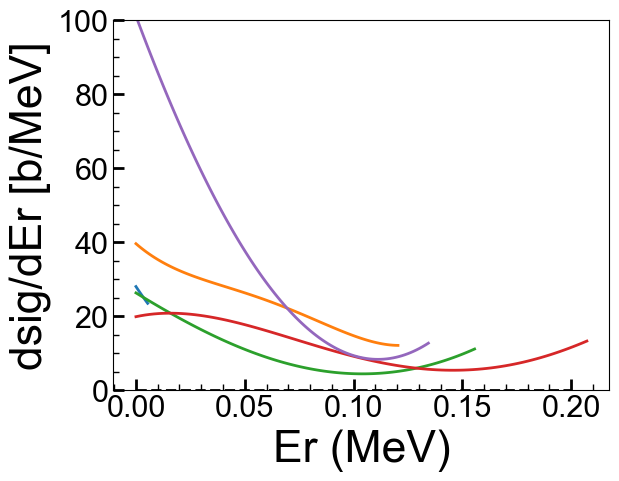

In [11]:
#plot quick
fig = plt.figure()
ax1 = fig.add_subplot(111)
fct = np.flip(ct)
plot(0.04*escale, (jac/0.04)/10*dsdomegv(ct))
plot(0.896*escale, (jac/0.896)*dsdomeg1v(ct))
plot(1.158*escale, (jac/1.158)*dsdomeg2v(ct))
plot(1.542*escale, (jac/1.542)*dsdomeg3v(ct))
plot(1*escale, (jac/1.0)*dsdomeg4v(ct))
ax1.hlines(0,0,0.2,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(0,100)
xlabel('Er (MeV)')
ylabel('dsig/dEr [b/MeV]')
show()

In [12]:
dsder = endfel.fetch_der_xn(En=1e6,M=m28si,pts=1000,eps=1e-5)
dsderv = np.vectorize(dsder)

dsder1 = endfel.fetch_der_xn(En=1.542e6,M=m28si,pts=1000,eps=1e-5)
dsder1v = np.vectorize(dsder1)

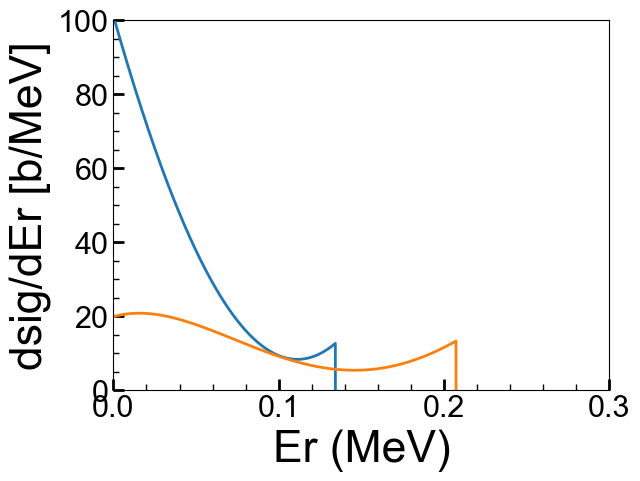

In [13]:
#plot quick
fig = plt.figure()
xmax=0.3
ax1 = fig.add_subplot(111)
er = np.linspace(0,xmax,1000)
plot(er, dsderv(er))
plot(er, dsder1v(er))
#ax1.hlines(0,0,xmax,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(0,100)
ax1.set_xlim(0,xmax)
xlabel('Er (MeV)')
ylabel('dsig/dEr [b/MeV]')
show()

In [14]:
#check integrals over Er
import importlib
importlib.reload(ms)
import flux_recoil_spec as frs
maxrec=ms.getMaxNRecoil(1.0,14,28)
spec=dsderv(er)
spec[er>=maxrec]=0
d = {'E':er,'spec':spec}
df = pd.DataFrame(data=d)      
integral = frs.integrate_df(df)

f = endfel.fetch_elastic(filename='../xn_data/si28_el.txt')

print(integral,f(1.0))

maxrec=ms.getMaxNRecoil(1.542,14,28)
spec=dsder1v(er)
spec[er>=maxrec]=0
d = {'E':er,'spec':spec}
df = pd.DataFrame(data=d)      
integral = frs.integrate_df(df)

print(integral,f(1.542))

4.694680064162556 4.67949254598138
2.469602107692559 2.4648373918713924


In [15]:
#check integrals over cos(theta)


d = {'E':ct,'spec':dsdomeg4v(ct)}
df = pd.DataFrame(data=d)      
integral = frs.integrate_df(df)

print(2*np.pi*integral,f(1.0))

d = {'E':ct,'spec':dsdomegv(ct)}
df = pd.DataFrame(data=d)      
integral = frs.integrate_df(df)

print(2*np.pi*integral,f(0.04))

4.7570869517976 4.67949254598138
1.3952413596559676 1.3812640177319284


In [16]:
importlib.reload(endfel)
m70ge = ms.getMass(32,70)
m182w = ms.getMass(74,182)
m16o = ms.getMass(8,16)

ge_dsder = endfel.fetch_der_xn(En=1.542e6,M=m70ge,pts=1000,eps=1e-5,sigtotfile='../xn_data/ge70_el.txt',endffile='../xn_data/n-032_Ge_070.endf')
ge_dsderv = np.vectorize(ge_dsder)

w_dsder = endfel.fetch_der_xn(En=1.542e6,M=m182w,pts=1000,eps=1e-5,sigtotfile='../xn_data/w182_el.txt',endffile='../xn_data/n-074_W_182.endf')
w_dsderv = np.vectorize(w_dsder)

o_dsder = endfel.fetch_der_xn(En=1.542e6,M=m16o,pts=1000,eps=1e-5,sigtotfile='../xn_data/o16_el.txt',endffile='../xn_data/n-008_O_016.endf')
o_dsderv = np.vectorize(o_dsder)

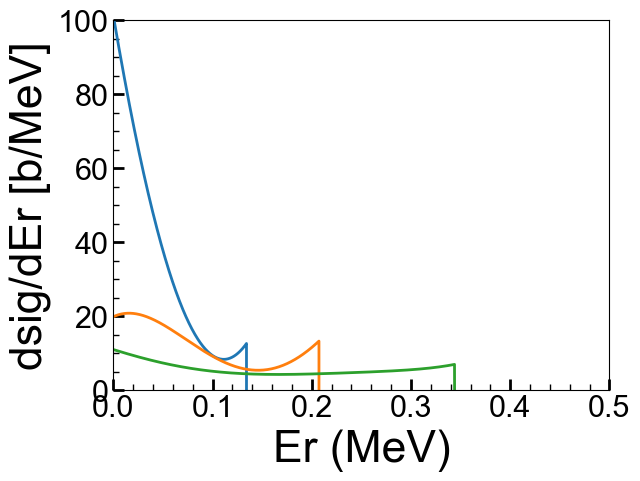

In [17]:
#plot quick
fig = plt.figure()
xmax=0.5
ax1 = fig.add_subplot(111)
er = np.linspace(0,xmax,1000)
plot(er, dsderv(er))
plot(er, dsder1v(er))
plot(er, o_dsderv(er))
#ax1.hlines(0,0,xmax,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(0,100)
ax1.set_xlim(0,xmax)
xlabel('Er (MeV)')
ylabel('dsig/dEr [b/MeV]')
show()

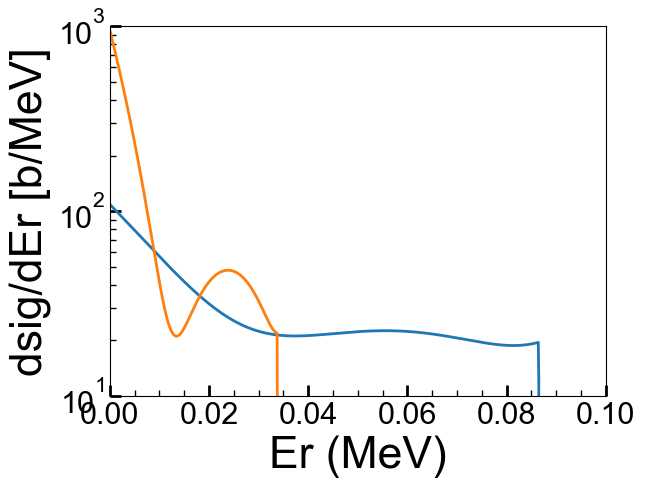

In [18]:
#plot quick
fig = plt.figure()
xmax=0.1
ax1 = fig.add_subplot(111)
er = np.linspace(0,xmax,1000)
plot(er, ge_dsderv(er))
plot(er, w_dsderv(er))
#ax1.hlines(0,0,xmax,'k',linestyle='--')
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(10,1000)
ax1.set_xlim(0,xmax)
xlabel('Er (MeV)')
ylabel('dsig/dEr [b/MeV]')
show()